# Hackathon : Great Indian Hiring

- >  To predict the price of retail items belonging to different categories.

- >   Foretelling the Retail price can be a daunting task due to the huge datasets with a variety of attributes ranging from Text, Numbers(floats, integers), and DateTime. Also, outliers can be a big problem when dealing with unit prices.

- Train.csv - 284780 rows x 8 columns (Inlcudes UnitPrice Columns as Target)

- Test.csv - 122049 rows x 7 columns


## Attribute Description:
- _Invoice No_ - Invoice ID, encoded as Label

- _StockCode_ - Unique code per stock, encoded as Label

- _Description_ - The Description, encoded as Label

- _Quantity_ - Quantity purchased

- _InvoiceDate_ - Date of purchase

- _UnitPrice_ - The target value, price of every product

- _CustomerID_ - Unique Identifier for every country

- _Country_ - Country of sales, encoded as Label

In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [297]:
import sklearn
print(sklearn.__version__)

0.22.1


In [298]:
data = pd.read_csv("Train.csv")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,1909,2001,2002,74215,18-01-2011 10:01,1.04,12346,35
1,18958,2001,2002,-74215,18-01-2011 10:17,1.04,12346,35
2,4942,25,3260,24,07-04-2011 10:43,0.25,12347,16
3,18367,2316,2063,20,07-12-2011 15:52,0.42,12347,16
4,15066,2316,2063,20,31-10-2011 12:25,0.42,12347,16


In [299]:
data.shape

(284780, 8)

In [300]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [301]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284780 entries, 0 to 284779
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    284780 non-null  int64  
 1   StockCode    284780 non-null  int64  
 2   Description  284780 non-null  int64  
 3   Quantity     284780 non-null  int64  
 4   InvoiceDate  284780 non-null  object 
 5   UnitPrice    284780 non-null  float64
 6   CustomerID   284780 non-null  int64  
 7   Country      284780 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 17.4+ MB


In [302]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
InvoiceNo,284780.0,9955.394083,5551.519138,0.0,5069.00,10310.00,14657.00,22188.0
StockCode,284780.0,1573.386807,843.604991,0.0,939.00,1521.00,2106.00,3683.0
Description,284780.0,2023.955573,1089.812078,0.0,1141.00,1987.00,2945.00,3895.0
Quantity,284780.0,12.028468,295.111588,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,284780.0,3.451216,78.399541,0.0,1.25,1.95,3.75,38970.0
CustomerID,284780.0,15288.224278,1714.336529,12346.0,13953.00,15152.00,16794.00,18287.0
Country,284780.0,32.823846,6.743602,0.0,35.00,35.00,35.00,36.0


In [303]:
import datetime
data["InvoiceDate"]= data['InvoiceDate'].astype('datetime64[ns]')

# data["InvoiceDate"]= data['InvoiceDate'].apply(pd.to_datetime) can also be used.
# The initial csv reading can have the code: data = pd.read_csv("Train.csv", parse_date=[4 here'datetime_column_number'], index_col=0)

In [304]:
data.dtypes

InvoiceNo               int64
StockCode               int64
Description             int64
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                 int64
dtype: object

In [305]:
data["Country"].unique()

array([35, 16, 12, 18, 24,  2, 30, 26, 32,  1,  7,  3, 36,  9,  0, 13, 14,
       27, 15, 31, 17, 33, 28, 25, 34, 29, 19, 23, 20,  4,  8, 10,  6, 11,
       21,  5, 22], dtype=int64)

In [306]:
data["CustomerID"].unique().shape

(4339,)

In [307]:
data["StockCode"].unique().shape

(3619,)

In [308]:
data['UnitPrice'].value_counts().to_frame('Feature distribution')

,Feature distribution
1.25,32624
1.65,26160
2.95,19122
0.85,18379
0.42,15405
...,...
3.56,1
5.14,1
1.02,1
4.62,1


__For categorical Features lets plot some visualisation__

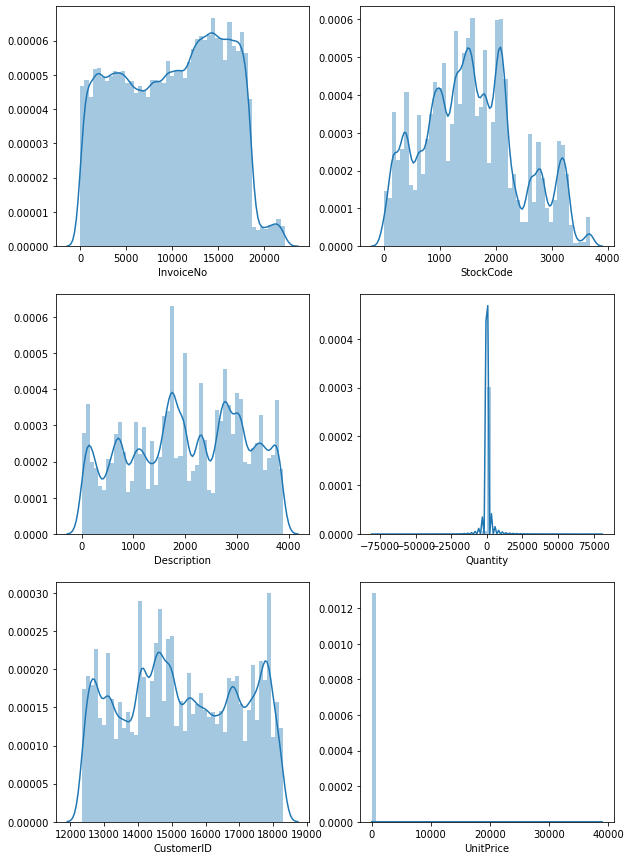

In [309]:
fig, axe=plt.subplots(nrows=3, ncols=2,figsize=(10,15))
axe = axe.flatten()

sns.distplot(data['InvoiceNo'], ax=axe[0])
sns.distplot(data['StockCode'], ax=axe[1])
sns.distplot(data['Description'], ax=axe[2])
sns.distplot(data['Quantity'], ax=axe[3])
sns.distplot(data['CustomerID'], ax=axe[4])
sns.distplot(data['UnitPrice'], ax=axe[5])


In [310]:
data.corr()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceNo,1.000000,0.086809,0.024804,-0.008363,0.007927,-0.007463,0.005432
StockCode,0.086809,1.000000,-0.013230,-0.000942,0.020073,0.002887,0.006242
Description,0.024804,-0.013230,1.000000,0.000194,-0.000424,-0.005227,-0.014791
Quantity,-0.008363,-0.000942,0.000194,1.000000,-0.000924,-0.002930,-0.008001
UnitPrice,0.007927,0.020073,-0.000424,-0.000924,1.000000,-0.004932,-0.005378
CustomerID,-0.007463,0.002887,-0.005227,-0.002930,-0.004932,1.000000,0.388198
Country,0.005432,0.006242,-0.014791,-0.008001,-0.005378,0.388198,1.000000


__only correlation which is strong is between country & Customer ID which is 38.8%__

- Thus the data is not that highly collinear so the overfitting issue may not be encountered

In [311]:
data.skew().to_frame('Skewness Measure')

,Skewness Measure
InvoiceNo,-0.079704
StockCode,0.271247
Description,-0.133967
Quantity,0.226115
UnitPrice,438.340508
CustomerID,0.029524
Country,-3.050125


We can drop the invoice No column as it is not required in the model building. It is just the number, not that important

In [312]:
del data["InvoiceNo"]
data.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,2001,2002,74215,2011-01-18 10:01:00,1.04,12346,35
1,2001,2002,-74215,2011-01-18 10:17:00,1.04,12346,35
2,25,3260,24,2011-07-04 10:43:00,0.25,12347,16
3,2316,2063,20,2011-07-12 15:52:00,0.42,12347,16
4,2316,2063,20,2011-10-31 12:25:00,0.42,12347,16


In [313]:
featr = data.dtypes[data.dtypes!='object'].index
skew_featr = data[featr].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'skew':skew_featr})
skewness

,skew
UnitPrice,438.340508
StockCode,0.271247
Quantity,0.226115
CustomerID,0.029524
Description,-0.133967
Country,-3.050125


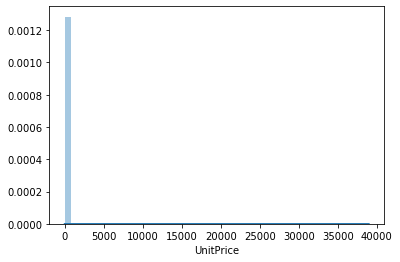

In [314]:
sns.distplot(data["UnitPrice"])

## Check the Skewness using Hypothesis testing: 

### - Shapiro Wilks test: 
 
#### - H0: Null hypothesis:
   The data is a sample from a normal distribution, 
#### - Ha: Alternate Hypothesis
   The data is not a sample of normal distribution
   
   so a ___p___ value ___<0.05___ implies: Reject __H0__ & Accept __Ha__
   indicates significant skewness in the data


In [315]:
resp = data.UnitPrice

from scipy.stats import shapiro
shapiro(resp)

C:\Users\GV62 7RD\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.0037339329719543457, 0.0)

___So the value is < 0.05 therefore, we reject the null hypothesis & accept the Alternate hypothesis which means the data is not from a normal distribution implying it has a significant skewness___

-  __skewness__ : Known as ___degree of distortion___ is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive, zero, negative, or undefined.


- The skewness for a normal distribution is zero, and any symmetric data should have a skewness near zero. Negative values for the skewness indicate data that are skewed left and positive values for the skewness indicate data that are skewed right.


-  By skewed left, we mean that the left tail is long relative to the right tail. 


- Similarly, skewed right means that the right tail is long relative to the left tail. If the data are multi-modal, then this may affect the sign of the skewness.


__Due to the high skewness the data needs to be standardised__ few methods are


- > Log transforms

- > square root transform 

- > Box-cox transform


### Our data (UnitPrice) is Right Skewed
source: https://medium.com/@TheDataGyan/day-8-data-transformation-skewness-normalization-and-much-more-4c144d370e55/


- > __Positively skewed data__:
    If tail is on the right as that of the second image in the figure, it is       right skewed data. It is also called positive skewed data.
    
- > Common transformations of this data include __square root, cube root, log, reciprocals__

- > __Cube root transformation__:
    The cube root transformation involves converting x to x^(1/3). This is a       fairly strong transformation with a substantial effect on distribution         shape: but is ___weaker than the logarithm___. It can be applied to negative       and zero values too. Negatively skewed data.

- > __Square root transformation__:
    Applied to _positive values_ only. Hence, observe the values of column         before applying.

- > __Logarithm transformation__:
    The __logarithm__, x to log base 10 of x, or x to log base e of x (ln x), or     x to log base 2 of x, is a strong transformation and can be used to reduce     right skewness.
    


### Reducing Left Skewness:
source: https://www.kaggle.com/getting-started/110134

Left skewness can be reduced applying the following transformation

__squares__ :
The square, x to x², has a moderate effect on distribution shape and it could be used to reduce left skewness. Squaring usually makes sense only if the variable concerned is zero or positive, given that (-x)² and x² are identical.

__Cubes__ :
The cube, x to x³, has a better effect on distribution shape than squaring and it could be used to reduce left skewness.

__Higher powers__:
When simple transformation like square and cubes doesn’t reduce the skewness in the data distribution, we can use Higher powers to transform to data. It is only useful in left skewness.

### Sqrt transform :

It can be easily done via Numpy, just by calling the sqrt() function on the desired column

In [316]:
# __Here the squareroot transform is performed on top of a log transform__

In [317]:
data["UnitPrice"].skew()

438.34050836571714

___Performing the Sqrt transform on top of the log transform___

In [318]:
# data['unit_sqrt'] = np.sqrt(data["UnitPrice_log"])
# data['unit_sqrt'].skew()

sqrt_resp = resp**(0.5)

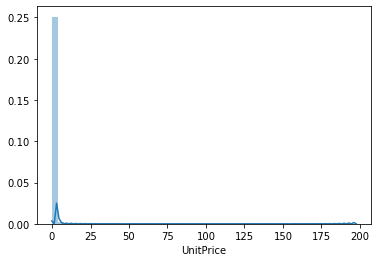

In [319]:
# sns.distplot(data['unit_sqrt'])
sns.distplot(sqrt_resp)

__Still quite large skewness present__

### Log transform

In [320]:
data['UnitPrice_log'] = np.log((1+data["UnitPrice"]))
data['UnitPrice_log'].skew()


#variant 2 
# log_resp = np.log(1+resp) 

1.0596017909901858

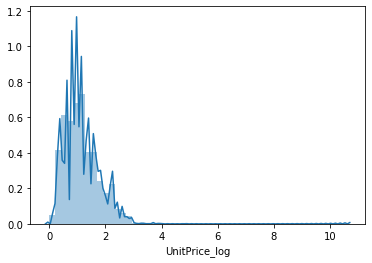

In [321]:
sns.distplot(data['UnitPrice_log'])

#variant 2
# sns.distplot(log_resp)

__Here we can compare from the above graph that the log transformation has removed a bit of skewness & brought the distribution closer to a normal distribution__

## Cube root

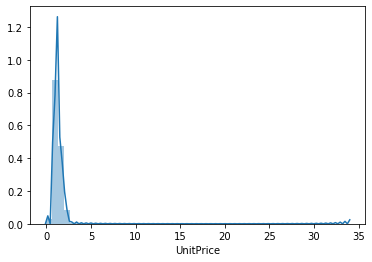

In [322]:
cub_resp = resp**(1/3)
sns.distplot(cub_resp)

### Box-Cox Transform

This function has a pre-requisite that the numeric values to be transformed must be positive (similar to what log transform expects). In case they are negative, shifting using a constant value helps. 

__Since here the values also include -ve in the UnitPrice feature so, this method cannot be applied__

## Auto skewness transform

In [323]:
# !pip instal skew_autotransform

In [324]:
# from skew_autotransform import skew_autotransform

# transformed = skew_autotransform(data['UnitPrice'].tolist())
# transformed

In [325]:
data

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,UnitPrice_log
0,2001,2002,74215,2011-01-18 10:01:00,1.04,12346,35,0.712950
1,2001,2002,-74215,2011-01-18 10:17:00,1.04,12346,35,0.712950
2,25,3260,24,2011-07-04 10:43:00,0.25,12347,16,0.223144
3,2316,2063,20,2011-07-12 15:52:00,0.42,12347,16,0.350657
4,2316,2063,20,2011-10-31 12:25:00,0.42,12347,16,0.350657
...,...,...,...,...,...,...,...,...
284775,2915,2486,6,2011-05-22 10:39:00,2.55,18287,35,1.266948
284776,535,3145,18,2011-05-22 10:39:00,2.95,18287,35,1.373716
284777,603,1184,4,2011-12-10 10:23:00,3.75,18287,35,1.558145
284778,1017,1679,4,2011-12-10 10:23:00,4.25,18287,35,1.658228


C:\Users\GV62 7RD\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


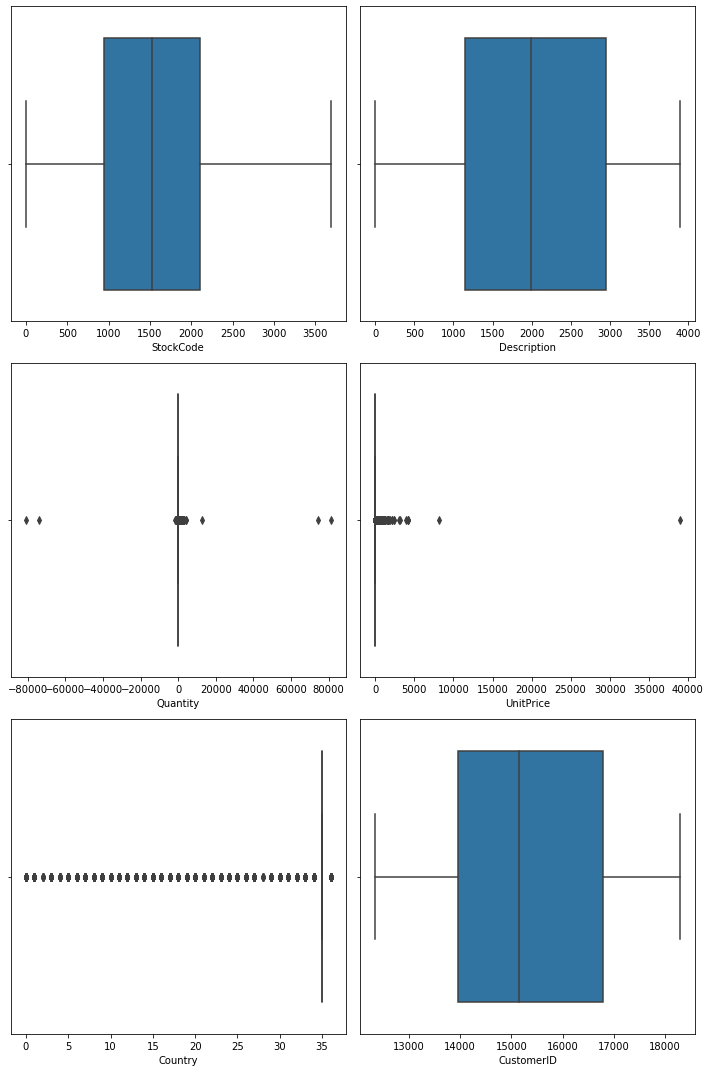

In [326]:
fig, axe=plt.subplots(nrows=3, ncols=2,figsize=(10,15))
axe = axe.flatten()

sns.boxplot(x='StockCode', data=data, ax=axe[0])
sns.boxplot(x='Description', data=data, ax=axe[1])
sns.boxplot(x='Quantity', data=data, ax=axe[2])
sns.boxplot(x='UnitPrice', data=data, ax=axe[3])
sns.boxplot(x='Country', data=data, ax=axe[4])
sns.boxplot(x='CustomerID', data=data, ax=axe[5])


fig.tight_layout()
fig.show()

__Quantity, UnitPrice & Country_ hass many outliers__

- Also unlike others we can't replace with mean value or any other to remove outliers since the data is different & the meaning changes if done so as it is label encoded

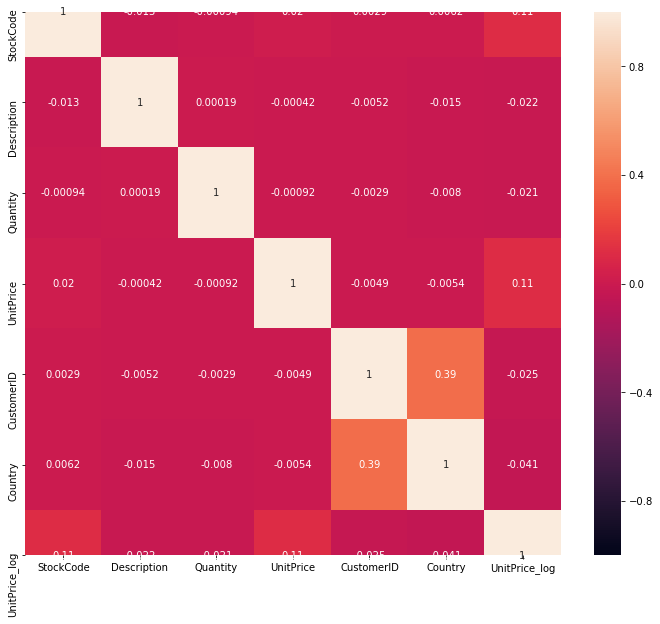

In [327]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True, vmax=1, vmin=-1)

Country & Customer Id Are correlated & rest all not that much.

In [328]:
data.sample(5)

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,UnitPrice_log
121859,970,727,4,2011-03-25 11:01:00,1.65,14796,35,0.974560
189506,1014,2934,3,2010-02-12 11:41:00,4.95,16244,35,1.783391
171716,2963,294,8,2011-06-20 13:27:00,4.95,15825,35,1.783391
120189,2321,1119,6,2011-01-12 16:05:00,2.08,14766,35,1.124930
13917,284,68,32,2011-04-27 12:02:00,1.25,12621,14,0.810930


In [329]:
df1 = data.drop("UnitPrice", axis=1)
df2 = df1.drop("InvoiceDate", axis=1)
df2.head()

,StockCode,Description,Quantity,CustomerID,Country,UnitPrice_log
0,2001,2002,74215,12346,35,0.712950
1,2001,2002,-74215,12346,35,0.712950
2,25,3260,24,12347,16,0.223144
3,2316,2063,20,12347,16,0.350657
4,2316,2063,20,12347,16,0.350657


In [330]:
df2.shape

(284780, 6)

In [331]:
# drop = df.drop("UnitPrice_log", axis=1,inplace=True)

In [332]:
X = df2.drop('UnitPrice_log', axis=1)
y = df2['UnitPrice_log']

In [333]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [334]:
X_train.head()

,StockCode,Description,Quantity,CustomerID,Country
173418,165,3377,1,15858,35
3554,2919,3259,24,12423,3
254201,1234,679,10,17676,35
265738,891,1783,3,17841,35
106577,2088,706,4,14554,35


In [335]:
X_train.shape

(227824, 5)

In [336]:
y_train.shape

(227824,)

In [337]:
y_train.head()

173418    0.810930
3554      0.350657
254201    0.615186
265738    1.124930
106577    1.638997
Name: UnitPrice_log, dtype: float64

In [338]:
X_test.shape

(56956, 5)

### Applying model without Scaling

# LinearRegression

In [339]:
from sklearn.linear_model import LinearRegression

In [340]:
model = LinearRegression()

In [341]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [342]:
#test with the test data

In [343]:
test = pd.read_csv("test.csv")
test.shape

(122049, 7)

In [344]:
test.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'CustomerID', 'Country'],
      dtype='object')

In [345]:
test1 = test.drop("InvoiceNo", axis=1)
test2 = test1.drop("InvoiceDate", axis=1)
test2.head()

,StockCode,Description,Quantity,CustomerID,Country
0,1709,1079,3,16161.0,35
1,510,3457,1,17341.0,35
2,604,694,36,15158.0,35
3,1478,3473,2,16033.0,35
4,3216,871,1,15351.0,35


In [346]:
y_pred = model.predict(test2)

In [261]:
# Remove the negative value

# y_pred[y_pred<0] = 0

In [228]:
# from sklearn.metrics import mean_squared_log_error, mean_squared_error
# r2 = model.score(X_test, y_test)
# RMSLE = np.sqrt(mean_squared_log_error(y_test, y_pred))
# RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

# print()
# print("Results from local train-test split:")
# print("r^2: {}.".format(r2))
# print("RMSLE: {}.".format(RMSLE))
# print("RMSE: {}.".format(RMSE))
# print()

In [354]:
# prediction = np.expm1(y_pred)
# prediction

In [347]:
y_test

136576    0.810930
65592     1.558145
84409     0.350657
67439     0.500775
125401    1.373716
            ...   
202825    1.558145
80263     1.241269
87726     0.438255
228016    0.350657
166251    0.810930
Name: UnitPrice_log, Length: 56956, dtype: float64

In [348]:
from sklearn import metrics

In [349]:
file = pd.DataFrame(y_pred)

In [350]:
file.columns=["UnitPrice"]

In [351]:
file.to_csv('Submit1.csv', index=False)

In [352]:
pd.read_csv('Submit1.csv')

,UnitPrice
0,1.172902
1,1.044343
2,1.092303
3,1.126312
4,1.298475
...,...
122044,1.235587
122045,1.290479
122046,1.123376
122047,1.163570


# RandomForestRegressor

In [355]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
model1.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [356]:
predict_rfr = model1.predict(test2)

In [357]:
file_rfr = pd.DataFrame(predict_rfr)
file_rfr.columns = ["UnitPrice"]

In [358]:
file_rfr.to_csv('submissions_rfr.csv', index=False)

In [359]:
pd.read_csv('submissions_rfr.csv')

,UnitPrice
0,0.974560
1,0.812567
2,1.493662
3,0.948664
4,2.621039
...,...
122044,0.322878
122045,0.989541
122046,0.810930
122047,1.583394


### Scaling the data: only independent Variables

In [360]:
from sklearn.preprocessing import StandardScaler

In [378]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
test2_scaled = scaler.fit_transform(test2)

In [362]:
X_train_scaled

array([[-1.66991516,  1.24346599, -0.03812246,  0.3327419 ,  0.32308762],
       [ 1.59496194,  1.13507967,  0.04334255, -1.67135552, -4.41584115],
       [-0.40261174, -1.23472295, -0.00624485,  1.39342577,  0.32308762],
       ...,
       [ 1.31636858, -0.4989819 ,  0.05396842, -0.2816146 ,  0.32308762],
       [ 1.97195211, -0.2280161 ,  0.13543344,  0.06552891,  0.32308762],
       [ 1.42899143,  1.59985492, -0.03812246, -0.33529058,  0.32308762]])

In [383]:
test2_scaled 

array([[ 0.16097952, -0.8710296 , -0.16825042,  0.51087369,  0.32158065],
       [-1.25778309,  1.3152492 , -0.20507509,  1.20017411,  0.32158065],
       [-1.146554  , -1.2249898 ,  0.43935655, -0.07503167,  0.32158065],
       ...,
       [-0.18217408,  1.33087861, -0.11301343,  0.15687703,  0.32158065],
       [ 0.06868303, -0.54465073, -0.20507509,  0.36249885,  0.32158065],
       [ 0.60944576, -1.21395727, -0.16825042,  0.62712011,  0.32158065]])

In [375]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

In [379]:
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
y_train = lab_enc.fit_transform(y_train)
print(y_train)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(y_train))

[ 82  33  61 ...  88 114 268]
multiclass
multiclass
multiclass


In [381]:
dtree = DecisionTreeRegressor(criterion='mse')
dtree.fit(X_train_scaled,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [393]:
predict_dt = dtree.predict(test2_scaled)

In [394]:
file_dt = pd.DataFrame(predict_dt)
file_dt.columns = ["UnitPrice"]

file_dt.to_csv('submissions_dt.csv', index=False)

pd.read_csv('submissions_dt.csv')

,UnitPrice
0,98.0
1,82.0
2,197.0
3,82.0
4,211.0
...,...
122044,29.0
122045,101.0
122046,98.0
122047,167.0


In [392]:

# dt_pred = dtree.predict(test2_scaled)

# DT_accuracy=accuracy_score(y_test, dt_pred)
# print('\nConfusion Matrix \n\n', confusion_matrix(y_test,dt_pred))
# print('\n Accuracy Score\n', DT_accuracy*100)
# print('\Classification Report\n\n', classification_report(y_test,dt_pred))